In [6]:
# imports
import requests
import json
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import inspect

# settings to load data
mypath = 'data/04_raw_financial/'

onlyfiles = [mypath + f for f in listdir(mypath) if (isfile(join(mypath, f)))]

onlyfiles = [f for f in onlyfiles if 'simplified' in f ]


In [2]:
%cd G:\Meine Ablage\TechLabs\Scam Busters

G:\Meine Ablage\TechLabs\Scam Busters


In [ ]:
time_to_pump = 5
expected_pump_row = -30

In [138]:
max_possible_return = test_df.iloc[-30:-25].high.max() / test_df.iloc[-40:-31].low.min()

1.888111111111111

In [38]:
test_df = pd.read_csv(onlyfiles[7],index_col=0)
idxmax = (test_df.high/test_df.open).idxmax()
print(idxmax,(test_df.high/test_df.open)[idxmax])

5861 1.064410480349345


<AxesSubplot:>

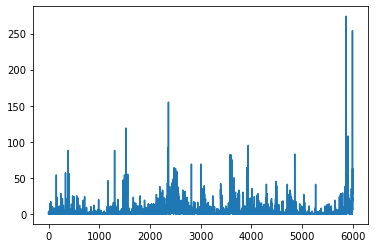

In [36]:
test_df.n_trades.plot()

<AxesSubplot:>

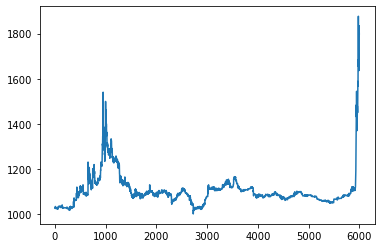

In [82]:
test_df.high.plot()

<AxesSubplot:>

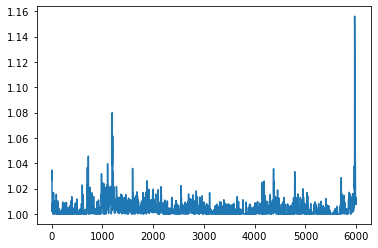

In [88]:
(test_df.high.rolling(5).max() / test_df.high.rolling(5).min()).plot()

In [143]:
def pump_success_indicator(file):
    df = pd.read_csv(file)
    high, open = df.high, df.open
    idx_indicator = (high/open).idxmax()
    indicator = (high/open)[idx_indicator]
    high_max=df['high'].rolling(2).max()
    open_max=df['open'].rolling(2).max()
    open_max = open_max.dropna().reset_index(drop=True)
    max_possible_return = df.iloc[-40:-25].high.max() / df.iloc[-40:-25].low.min()
    max_5m_return = (high_max/open_max).dropna().max()
    max_5m_return_idx = (high_max/open_max).dropna().idxmax()
    return {'indicator':indicator, 'idx_indicator':idx_indicator,
        'max_possible_return':max_possible_return}

all_indicators = pd.DataFrame([
    pump_success_indicator(file)
    for file
    in onlyfiles
])

In [144]:
all_indicators.sort_values('max_possible_return').iloc[50:]

,indicator,idx_indicator,max_possible_return
70,1.035714,5944,1.042424
13,1.047233,4593,1.048369
67,1.042990,521,1.054541
39,1.130515,653,1.134286
58,1.059480,5969,1.169471
59,1.136794,5969,1.197605
60,1.248973,5969,1.265458
61,1.328125,5969,1.360000
38,1.278150,5964,1.453287
12,1.467742,5969,1.523810


<AxesSubplot:>

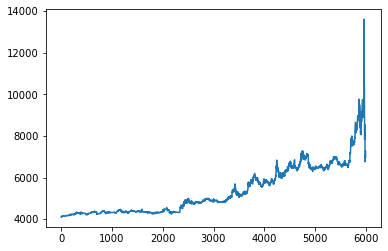

In [131]:
test_df = pd.read_csv(onlyfiles[10])
test_df.open.plot()

In [ ]:
# cut dataframe to end just before the pump
def get_prepump_df(df):
    ()

In [ ]:
def returns_before_pump(df,hours_to_pump):
    '''returns the ROI if investing hours_to_pump 
    number of hours before the exit and exiting
    time_to_pump minutes before the pump'''
    
    return 1

In [ ]:
def feat3(df):
    hjkff

In [4]:
# full engineering for a single df
def compute_features(df):
    features = {
        'f01':f01(df),
        'feat3':feat3(df)
    }
    return features

In [ ]:
# add the label
# pump column

In [ ]:
# get all features
engineered_df = pd.concat([
    compute_features(pd.read_csv(file))
    for file
    in onlyfiles
])

In [ ]:
# add market cap
market_cap_df = pd.read_csv('Frame 1\General history Data\Feature Engineering\market_cap.csv')
engineered_df = pd.merge(engineered_df, market_cap_df, left_on= 'coinnames', right_on='symbol', how = 'left').drop(['Unnamed: 0', 'symbol'], axis = 1)
engineered_df.market_cap = engineered_df.market_cap.fillna(market_cap_df.market_cap.min()*0.001)

In [ ]:
engineered_df.to_csv('Samples/financial_data/engineered/sample.csv')